# Discrete Random Variables

In [1]:
#%reset
import numpy as np
import matplotlib.pyplot as plt
figsize=[6,3]

# These are some parameters to make figures nice (and big)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)


https://en.wikipedia.org/wiki/Random_variable

###  From random process to random variables

Consider the random process of throwing a six-sided fair die,
$\Omega$={<span>&#9856;,&#9857;,&#9858;,&#9859;,&#9860;,&#9861;</span>}


**Definition**: Random variable
For our purspose we can define a (univariate) random variable $X$ is a function that defined on the sample space of a random process that associates a real number for every event in the event space of the sample space.

$$ X:\Omega \rightarrow \mathbb{R}$$

We will denote by capital $X$ the random variable, i.e., the function from $\mathcal S$ to $\mathbb R$,  and by small cap $x$, the value the random variable $X$ takes in the real numbers.

Examples of random variables: the result of rolling a dice. The total amount of rainfall falling in a day. The duration of rainfall falling in a day. The magnitude of an Earthquake. 


## Examples of discrete random variables
### Uniform discrete random variable


The simples example of a random variable is that of a uniform discrete random variable. For example, consider the random variable $X$ that is associated with the value on the face of a die. This random variable takes discrete values between 1 and 6. 

**Simulation** 

We can simulate this random variable using the <code>stats.randint.rvs</code> method from the <code>scipy</code> library. 

However, remember that python interprets intervals as closed on the left(lower bound) 
and open on the right (upper bound). If you specify a bound in python using $a$ and $b$, Python itnerprets it as $[a,b)$. So to specify the discrete itnerval $[1,6]$ we actually have to specify it as $[1,7)$. This is sometimes called left-inclusive right-exclusive, because the value on the left (lower bound) is included, whereas the value on the right (upper bound) is excluded. 

The <code>stats</code> class has a method to generate randint objects that deal with uniform discrete (integer-valued) random variables. 
https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_randint.html
https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.randint.html#scipy.stats.randint <br>
The bottom of the above documentation page for <code>randint</code> describes the methods. The randint object has method <code>rvs</code> to generate such a random variable



In [26]:
# let's import the stats module from the scipy library
from scipy import stats

#Simulate random variable taking values between 1 (inclusive) and 7 (exclusive). 
#Let's say we only want to simulate this random variable once
# Rerun this cell several times to simulate a throw of the dice
X=stats.randint.rvs(low=1, high=7, size=1)
print(X)

[2]


### Bernoulli Random Variable
A Bernoulli random variable is a variable that can only take values of $1$ or $0$. It takes a value of $1$ with probability $p$ and $0$ with probability $1-p$

We can simulate a random variable using the fair die. For example, we can define a Bernoulli random variable $Y$ which takes value $1$ if the roll is larger than 3, and $0$ otherwise. In this case, the Bernoulli random variable has $p=0.5$.

In [27]:
# rerun this cell to simulate more realizations of a bernoulli random variable
X=stats.randint.rvs(low=1, high=7, size=1)
if X>3: 
    Y=1
else: 
    Y=0
print(Y)

1


Another way to generate a Bernoulli random variable with $p=1$ is by flipping a fair coin, and assigning $1$ for heads and $0$ for tails. 

We could generate a Bernoulli random variable with $p=1/3$ by defining it as taking value 1 if the die roll is larger than 4 (i.e. 5 or 6), and zero otherwise. 

In practice, we can generate realizations of a Bernoulli random variable with any $p$ using the same <code>stats</code> module from <code>scipy</code>. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html

In [28]:
# Rerun this cell to generate Bernoulli random variables with $p=0.5$
X=stats.bernoulli.rvs(p=0.5, size=1)
print(X)

[1]


In [29]:
# Rerun this cell to generate Bernoulli random variables with $p=0.9$
X=stats.bernoulli.rvs(p=0.9, size=50)
print(X)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1]


### Sum of two dice
Let's take another example of a random variable. Consider rolling two fair dice

![two_dice.png](M01_two_dice.png)

And define a random variable $S$ whose value is the sum of the two dice rolls. 

![dice_sum](M01_dice_sum.png)

We can generate realizations of this random variable by generating two (independent) dice and taking their sum


In [30]:
X=stats.randint.rvs(low=1, high=7, size=1)
Y=stats.randint.rvs(low=1, high=7, size=1)
S=X+Y
print(S)

[9]


<hr style="border:1px solid black"> </hr>

## Distributions of discrete random variable

### Probability mass functions
How do we describe the possible outcome of a random variable? Random variables can be described - and are actually defined - by their distribution functions. Instead of a "bernoulli random variable" we will usually say a "Bernoulli-distributed random variable". 


For discrete random variables these distributions functions are called **probability mass functions (pmf)**. the pmf of a random variable $X$ is: 

$$p(x_i)=P(X=x_i),$$ 

sometimes denoted as 

$$p_X(x_i).$$

For the uniform discrete random variable associated with a roll of the dice the distribution function is pretty straight-forward. It takes value of 1/6 if $x_i\in\{1,2,3,4,5,6\}$ and zero otherwise. The Bernoulli random variable with parameter p has a similarly straightforward pmf, which takes value of $p$ for $x_i$=1, and $1-p$ for $x_i=0$. 

The table above also allows us to easily compute the pmf for the sum of two fair dice. The pmf only takes non-zero values for $x_i\in\{1,\ldots,12\}$. For example $p(5)$ is the probability of rolling a total of 5, and it can be read from the table as $p(5)=4/36=1/9$

Let's visualize the pmfs for the three random variables described. The random variable objects <cin <code>scipy.stats</code> have the pmf as a method

**Uniformly distributed random variable (Sincle dice)**


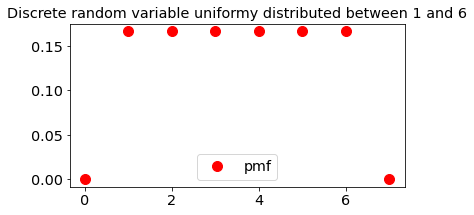

In [31]:
#define an x-axis
x=np.arange(0,8,1)

#plot 
fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x, stats.randint.pmf(x,low=1,high=7), 'ro',ms=10,
        label='pmf')
ax.set_title('Discrete random variable uniformy distributed between 1 and 6')
ax.legend(loc='best')
plt.show()

**Bernoulli Random variable** 

In [1]:
#Bernoulli random variable with p=0.5

p=0.5
#define an x-axis
x=np.arange(-2,5,1)

#plot 
fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x, stats.bernoulli.pmf(x,p), 'ro',ms=10,
        label='pmf')
ax.set_title('Bernoulli with p=0.4')
ax.legend(loc='best')
plt.show()

NameError: name 'np' is not defined

**Sum of two dice**

We don't have a ready-made method for generating a random variable with the same distribution as the sum of two random variables. But we can define and read the pmf from the table above

In [2]:
# define the pmf
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

#notice we need to make the pmf p_2dice as numpy array.

fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf')
ax.set_title('Discrete random variable uniformy distributed between 1 and 6')
ax.legend(loc='best');


NameError: name 'np' is not defined

### Realization/Draw
We would call the value of the random variable associated with a throw of the dice a **realization** or **draw** of the random process and of the random variable. 
The cell above generates a single realizatoin of the random variable. But we can generate multiple realizatoins at once and save them in an array



In [34]:
#Rerun this cell several times to simulate 20 realizations 
#of a Uniform Discrete Random Variable  (i.e. 20 throws of the die)
X=stats.randint.rvs(low=1, high=7, size=20)
print(X)

[5 1 6 2 2 1 1 5 6 3 2 1 1 4 4 1 5 4 5 5]


### Histograms

<b>Definition</b>: A histogram is an *approximate* representation of the distribution of a random variable, done through computing the frequency of observations occuring in certain ranges of values.

To compute a histogram we have to draw realizations of a ranodm variable, define a set of bins, and count the number of realizations within each bin. Let's do that for the three random variables discussed, and compare it with the pmf

Note ther are several ways to compute a histogram: Using <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">numpy.histrogram</a>,<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.histogram.html">scipy.histogram</a>, or <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">matplotlib.pyplot.hist</a>.

**Discrete uniform RV (one die)**

In [35]:
Ndraws=100

# PMF
x_uniform=np.arange(0,8,1)
p_uniform=stats.randint.pmf(x_uniform,low=1,high=7)

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_uniform=stats.randint.rvs(low=1, high=7, size=Ndraws)
bin_edges_uniform=np.arange(0.5,8.5,1)

print(X_uniform)


[1 1 1 4 6 5 5 1 6 3 1 3 6 5 6 4 1 5 4 4 6 1 2 6 5 5 1 3 1 1 4 6 4 1 3 4 1
 1 6 6 2 1 3 6 3 6 6 1 1 1 6 6 5 2 3 1 1 6 1 5 6 3 3 5 2 3 6 2 2 3 1 3 3 6
 5 1 5 5 3 1 5 2 1 6 6 2 4 4 4 6 4 3 1 6 1 6 1 6 3 1]


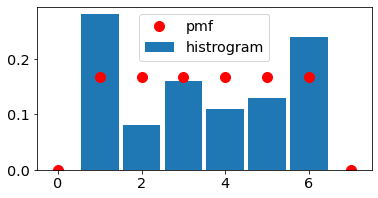

In [36]:
fig, ax = plt.subplots(1, 1,figsize=figsize)


ax.hist(X_uniform,bins=bin_edges_uniform,density=True,rwidth=0.9,label='histrogram')
ax.plot(x_uniform,p_uniform , 'ro',ms=10,
        label='pmf');
ax.legend();
ax.set_xlim(left=-0.5, right=7.5);

**Bernoulli**

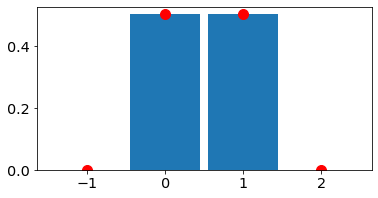

In [37]:
N_draws=10;
p_bern=0.5;

#PMF
x_bernoulli=np.arange(-1,3,1)
p_bernoulli=stats.bernoulli.pmf(x_bernoulli,p=p_bern)

# generate random variables and define edges 
#(note we want the integers to be in the bins, not at the edges)
X_bernoulli=stats.bernoulli.rvs(p=p_bern, size=N_draws)
bin_edges_bernoulli=np.arange(-1.5,3.5,1)


#Plot
fig, ax = plt.subplots(1, 1,figsize=figsize)
ax.hist(X_bernoulli,bins=bin_edges_bernoulli,density=True,rwidth=0.9)
ax.plot(x_bernoulli, p_bernoulli, 'ro',ms=10,
        label='pmf');

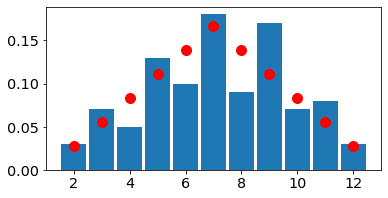

In [38]:
Ndraws=100

# PMF
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Y_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Z_2dice=X_1die+Y_1die

bin_edges_2dice=np.arange(1.5,13.5,1)


fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.hist(Z_2dice,bins=bin_edges_2dice,density=True,rwidth=0.9)
ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf');

```{Danger}
For *discrete* random variables the histogram can give weird results if the bins are not set appropriately (for example if they are of unequal weidth)
```


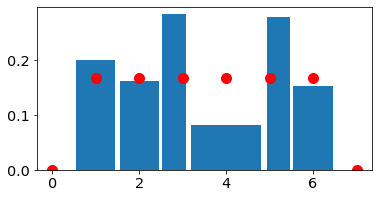

In [39]:
Ndraws=400

# PMF
x_uniform=np.arange(0,8,1)
p_uniform=stats.randint.pmf(x_uniform,low=1,high=7)

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_uniform=stats.randint.rvs(low=1, high=7, size=Ndraws)

#compare teh two below:
#bin_edges_uniform=np.asarray([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
bin_edges_uniform=np.asarray([0.5, 1.5, 2.5, 3.1, 4.9, 5.5, 6.5])


fig, ax = plt.subplots(1, 1,figsize=figsize)


ax.hist(X_uniform,bins=bin_edges_uniform,density=True,rwidth=0.9)
ax.plot(x_uniform,p_uniform , 'ro',ms=10,
        label='pmf');

### Convergence of histograms to pmfs

As the number of draws, or realizations of the random variables increases, the histogram becomes a better and better approximation for the pmf.

$$h_N(x_i)\rightarrow p(x_i)$$

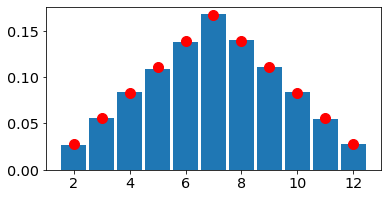

In [40]:
# change the number of draws for the 2 dice case
Ndraws=100000

# PMF
x_2dice=[2,3,4,5,6,7,8,9,10,11,12]
p_2dice=np.asarray([1,2,3,4,5,6,5,4,3,2,1])/36

# generate random variables and define edges 
# (note we want the integers to be in the bins, not at the edges)
X_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Y_1die=stats.randint.rvs(low=1, high=7, size=Ndraws)
Z_2dice=X_1die+Y_1die

bin_edges_2dice=np.arange(1.5,13.5,1)


fig, ax = plt.subplots(1, 1,figsize=figsize)

ax.hist(Z_2dice,bins=bin_edges_2dice,density=True,rwidth=0.9)
ax.plot(x_2dice, p_2dice, 'ro',ms=10,
        label='pmf');